In [2]:
# pip install opencv-python

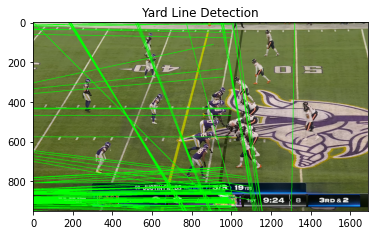

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_yard_lines(image_path):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Image not found.")
        return

    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve edge detection
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detector
    edges = cv2.Canny(blur, 50, 150, apertureSize=3)

    # Use Hough Line Transform to detect lines
    # These parameters can be tuned according to your specific conditions
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

    # Draw the lines on the image
    if lines is not None:
        for rho, theta in lines[:,0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y2 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y1 = int(y0 - 1000 * (a))
            cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display the result
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Yard Line Detection")
    plt.show()

# Path to your image
image_path = './test_image.png'
detect_yard_lines(image_path)